In [1]:
import glob
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import xclim as xc
import cftime
import seaborn as sns

from unseen import array_handling

Matplotlib is building the font cache; this may take a moment.


## AGCD

In [2]:
infiles = sorted(glob.glob('/g/data/zv2/agcd/v1-0-3/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_*.nc'))

In [3]:
ds = xr.open_mfdataset(infiles)
ds = ds.sel({'lat': -34.92, 'lon': 138.62}, method='nearest')
ds = ds.compute()

In [4]:
tx90 = xc.core.calendar.percentile_doy(
    ds['tmax'].sel(time=slice('1950-01-01', '2014-12-31')),
    window=5,
    per=90
)

In [5]:
tx90 = tx90.compute()
tx90 = tx90.sel(percentiles=90)

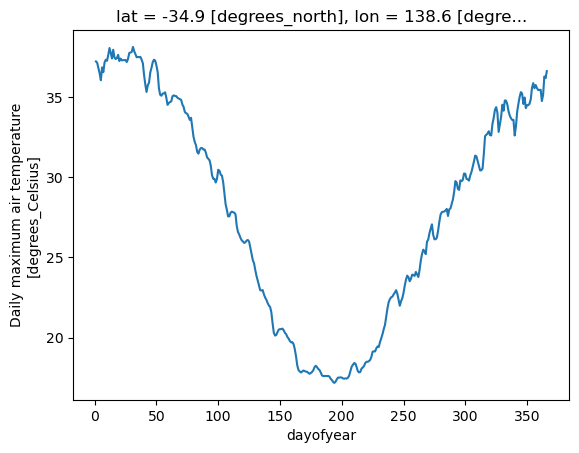

In [6]:
tx90.plot()

In [13]:
wsdi_monthly = xc.indicators.icclim.WSDI(
    tasmax=ds['tmax'],
    tasmax_per=tx90,
#    freq='YS',
#    freq='QE-FEB'
    freq='ME'
)   

In [15]:
wsdi_annual = xc.indicators.icclim.WSDI(
    tasmax=ds['tmax'],
    tasmax_per=tx90,
    freq='YE',
#    freq='QE-FEB'
#    freq='ME'
)   

In [16]:
wsdi_monthly_series = wsdi_monthly.to_series()
#wsdi_series.index = wsdi_series.index.year

In [17]:
wsdi_annual_series = wsdi_annual.to_series()

In [41]:
year = 2009
adjustment = year - 1910
wsdi_monthly_series[adjustment*12:(adjustment+1)*12]

time
2009-01-31    0.0
2009-02-28    0.0
2009-03-31    0.0
2009-04-30    0.0
2009-05-31    0.0
2009-06-30    0.0
2009-07-31    0.0
2009-08-31    0.0
2009-09-30    0.0
2009-10-31    0.0
2009-11-30    9.0
2009-12-31    0.0
Freq: ME, Name: WSDI, dtype: float64

In [39]:
wsdi_annual_series[90:]

time
2000-12-31     6.0
2001-12-31     0.0
2002-12-31     7.0
2003-12-31     0.0
2004-12-31     0.0
2005-12-31     7.0
2006-12-31     0.0
2007-12-31     0.0
2008-12-31    13.0
2009-12-31    15.0
2010-12-31     0.0
2011-12-31     7.0
2012-12-31     0.0
2013-12-31     0.0
2014-12-31     9.0
2015-12-31     6.0
2016-12-31     0.0
2017-12-31     0.0
2018-12-31     0.0
2019-12-31     0.0
2020-12-31     0.0
2021-12-31     0.0
2022-12-31     0.0
2023-12-31     0.0
2024-12-31     6.0
Freq: YE-DEC, Name: WSDI, dtype: float64

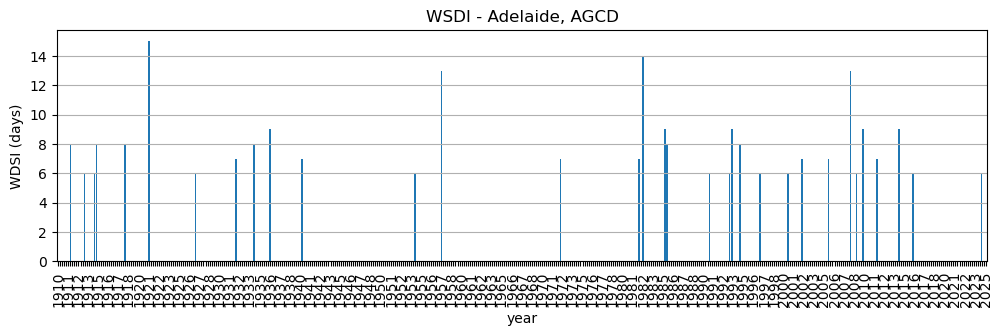

In [9]:
ax = wsdi_series.plot.bar(figsize=[12, 3], width=0.8)
ax.set_ylabel('WDSI (days)')
ax.set_xlabel('year')
ax.set_title('WSDI - Adelaide, AGCD')
plt.grid(axis='y')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
plt.show()

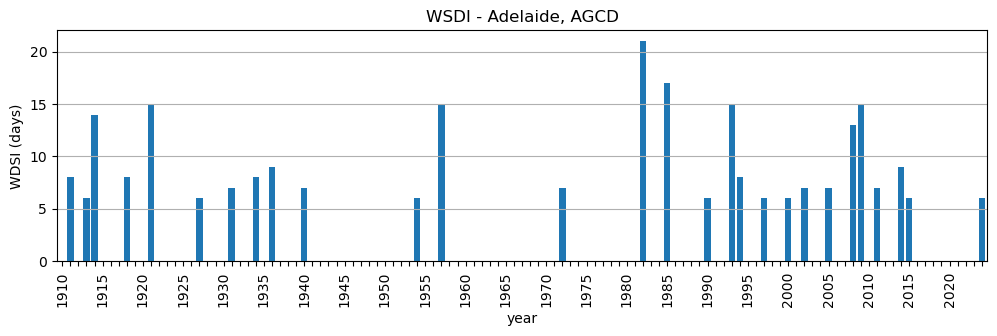

In [53]:
ax = wsdi_series.plot.bar(figsize=[12, 3], width=0.8)
ax.set_ylabel('WDSI (days)')
ax.set_xlabel('year')
ax.set_title('WSDI - Adelaide, AGCD')
plt.grid(axis='y')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
plt.show()

## CORDEX

In [61]:
hist_files = sorted(glob.glob('/g/data/py18/BARPA/output/CMIP6/DD/AUS-15/BOM/ACCESS-CM2/historical/r4i1p1f1/BARPA-R/v1-r1/day/tasmax/latest/tasmax_AUS-15_ACCESS-CM2_historical_r4i1p1f1_BOM_BARPA-R_v1-r1_day_*.nc'))

In [63]:
ssp370_files = sorted(glob.glob('/g/data/py18/BARPA/output/CMIP6/DD/AUS-15/BOM/ACCESS-CM2/ssp370/r4i1p1f1/BARPA-R/v1-r1/day/tasmax/latest/tasmax_AUS-15_ACCESS-CM2_ssp370_r4i1p1f1_BOM_BARPA-R_v1-r1_day_*.nc'))

In [64]:
cordex_files = hist_files + ssp370_files

In [65]:
ds_cordex = xr.open_mfdataset(cordex_files)
ds_cordex = ds_cordex.sel({'lat': -34.92, 'lon': 138.62}, method='nearest')
ds_cordex = ds_cordex.compute()
ds_cordex['tasmax'] = xc.core.units.convert_units_to(ds_cordex['tasmax'], 'degC')

/jobfs/149701454.gadi-pbs/ipykernel_250587/1814103595.py:1: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds_cordex = xr.open_mfdataset(cordex_files)


In [72]:
tx90_cordex = xc.core.calendar.percentile_doy(
    ds_cordex['tasmax'].sel(time=slice('1950-01-01', '2014-12-31')),
    window=5,
    per=90
)
tx90_cordex = tx90_cordex.compute()
tx90_cordex = tx90_cordex.sel(percentiles=90)

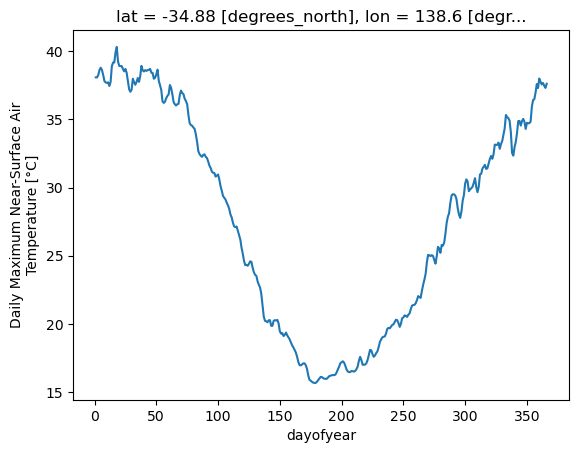

In [73]:
tx90_cordex.plot()

In [74]:
wsdi_cordex = xc.indicators.icclim.WSDI(
    tasmax=ds_cordex['tasmax'],
    tasmax_per=tx90_cordex,
    freq='YS',
)   

In [75]:
wsdi_cordex_series = wsdi_cordex.to_series()
wsdi_cordex_series.index = wsdi_cordex_series.index.year

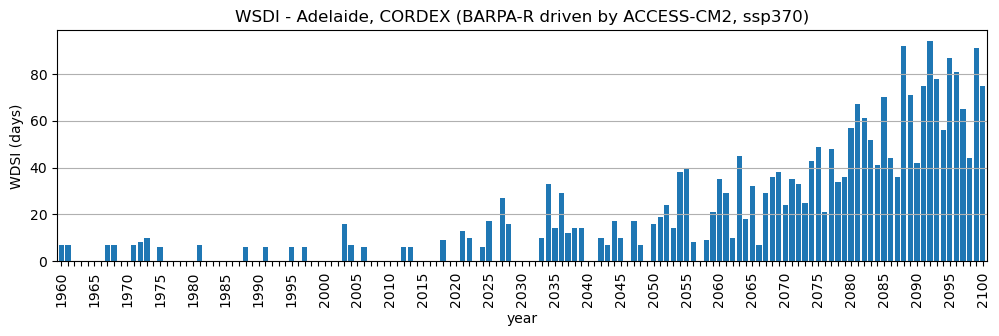

In [78]:
ax = wsdi_cordex_series.plot.bar(figsize=[12, 3], width=0.8)
ax.set_ylabel('WDSI (days)')
ax.set_xlabel('year')
ax.set_title('WSDI - Adelaide, CORDEX (BARPA-R driven by ACCESS-CM2, ssp370)')
plt.grid(axis='y')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
plt.show()

## DCPP

In [2]:
dcpp_file = '/g/data/xv83/dbi599/treasury/tasmax_day_CMCC-CM2-SR5_dcppA-hindcast_adelaide_19601101-20291231.nc'

In [3]:
ds_dcpp = xr.open_mfdataset(dcpp_file)
ds_dcpp = ds_dcpp.compute()

In [4]:
ds_dcpp

<xarray.Dataset> Size: 20MB
Dimensions:    (init_date: 60, ensemble: 20, lead_time: 3711)
Coordinates:
  * ensemble   (ensemble) int64 160B 0 1 2 3 4 5 6 7 ... 12 13 14 15 16 17 18 19
  * lead_time  (lead_time) int64 30kB 0 1 2 3 4 5 ... 3706 3707 3708 3709 3710
  * init_date  (init_date) object 480B 1960-11-01 00:00:00 ... 2019-11-01 00:...
    time       (lead_time, init_date) object 2MB 1960-11-01 12:00:00 ... 2029...
Data variables:
    tasmax     (init_date, ensemble, lead_time) float32 18MB 20.82 23.3 ... 16.8
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    comment:                none
    ...                     ...
    title:                  CMCC-CM2-SR5 output prepared for CMIP6
    variable_id:            tasmax
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by CMCC is licensed und...
    cmor_version:           3.6.0
    tracking_id:            hdl:21.14100/8bd4fa00-1bf2-4110-82b8-dc57c9b42e2e

In [93]:
60 * 20 * 10

12000

In [5]:
#ds_dcpp = array_handling.reindex_forecast(ds_dcpp)
#ds_dcpp = ds_dcpp.sel(time=slice('1950-01-01', '2014-12-31'))
#ds_dcpp

In [6]:
ds_dcpp['init_date'] = np.arange(0, len(ds_dcpp['init_date']))

In [7]:
def adjust_year(row):
    ensemble_num = row['ensemble']
    init_num = row['init_date']
    lead_year = math.floor(row['lead_time'] / 365)
    new_year = ensemble_num*1000 + init_num*14 + lead_year
    orig_time = row['time']
    orig_month = orig_time.month
    orig_day = orig_time.day
    new_time = cftime._cftime.DatetimeNoLeap(new_year, orig_month, orig_day)

    return new_time


def get_forecast_tx90(ds):
    """Calculate TX90 for forecast data."""
    
    df = ds['tasmax'].to_dataframe()
    df = df.reset_index()
    df = df.dropna()
    df = df[df['time'] < cftime._cftime.DatetimeNoLeap(2015, 1, 1)]
    df['time'] = df.apply(adjust_year, axis=1)
    unique_times = df['time'].unique()
    assert df['time'].size == unique_times.size
    df = df.drop(['lead_time', 'init_date', 'ensemble'], axis=1)
    df = df.sort_values(by='time')
    df = df.set_index('time')
    ds_flattened = df.to_xarray()
    ds_flattened = ds_flattened.compute()
    tx90 = xc.core.calendar.percentile_doy(ds_flattened['tasmax'], window=5, per=90)
    tx90 = tx90.compute()
    tx90 = tx90.sel(percentiles=90)
    tx90.attrs['units'] = ds['tasmax'].attrs['units']

    return tx90

In [8]:
tx90_dcpp = get_forecast_tx90(ds_dcpp)

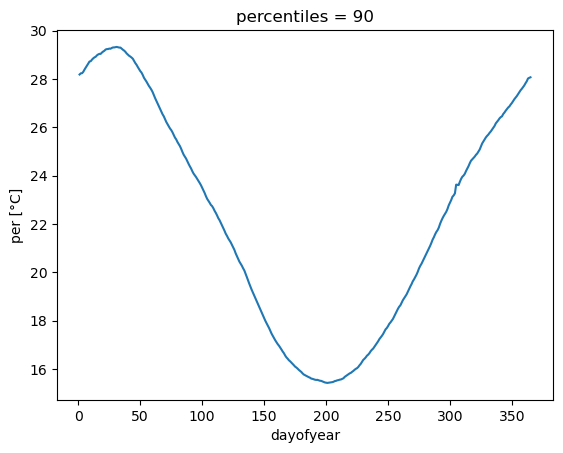

In [10]:
tx90_dcpp.plot()

In [11]:
wsdi_list = []
for ens in ds_dcpp['ensemble'].values:
    for init in ds_dcpp['init_date'].values:
        forecast = ds_dcpp['tasmax'].sel({'ensemble': ens, 'init_date': init})
        forecast = forecast.swap_dims({'lead_time': 'time'})
        wsdi = xc.indicators.icclim.WSDI(tasmax=forecast, tasmax_per=tx90_dcpp, freq='YS')
        wsdi_list.append(wsdi.dropna(dim='time').to_dataframe().reset_index())

In [12]:
wsdi_df = pd.concat(wsdi_list, ignore_index=True)

In [13]:
wsdi_df = wsdi_df.drop(['ensemble', 'init_date', 'percentiles'], axis=1)

In [15]:
def get_year(row):
    return row['time'].year

In [16]:
wsdi_df['year'] = wsdi_df.apply(get_year, axis=1)

In [26]:
wsdi_df = wsdi_df.drop('time', axis=1)

In [32]:
year_counts = wsdi_df['year'].value_counts()

In [42]:
year_counts = year_counts.sort_index()

In [ ]:
year_counts.shape

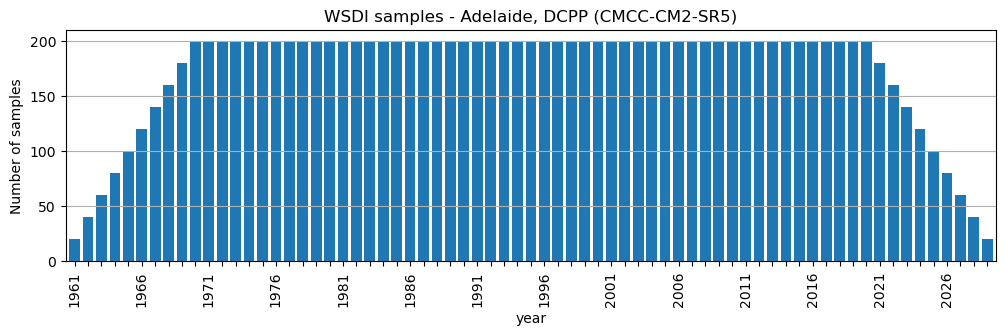

In [45]:
ax = year_counts.plot.bar(figsize=[12, 3], width=0.8)
ax.set_ylabel('Number of samples')
ax.set_xlabel('year')
ax.set_title('WSDI samples - Adelaide, DCPP (CMCC-CM2-SR5)')
plt.grid(axis='y')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)

In [74]:
wsdi_agcd = wsdi_series.copy()
wsdi_agcd = wsdi_agcd.reset_index()
wsdi_agcd.rename(columns={'time': 'year'}, inplace=True)
wsdi_agcd['source'] = ['AGCD',] * wsdi_agcd['year'].shape[0]

In [71]:
wsdi_df['year'].shape

12000

In [72]:
wsdi_df['source'] = ['CMCC-CM2-SR5',] * wsdi_df['year'].shape[0]

In [80]:
plot_df = pd.concat([wsdi_df, wsdi_agcd], ignore_index=True)
plot_df = plot_df[plot_df['year'] > 1960]

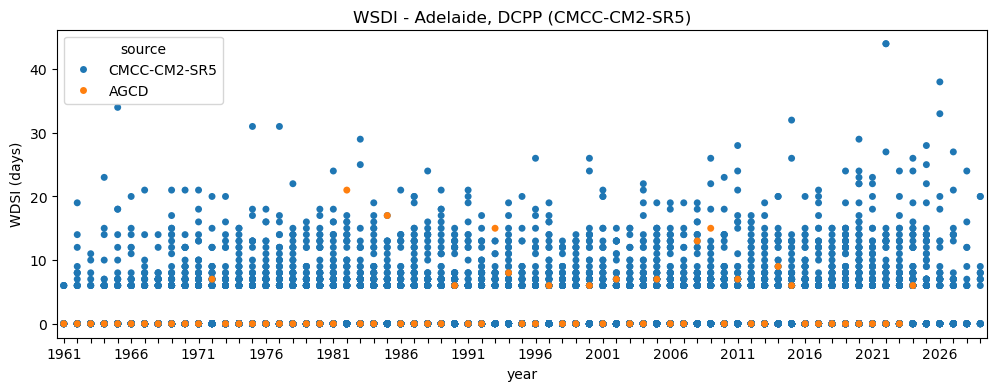

In [85]:
fig, ax = plt.subplots(figsize=[12, 4])
sns.stripplot(ax=ax, data=plot_df, jitter=False, x='year', y='WSDI', hue='source')
ax.set_ylabel('WDSI (days)')
ax.set_xlabel('year')
ax.set_title('WSDI - Adelaide, DCPP (CMCC-CM2-SR5)')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
plt.show()

In [90]:
plot_df[plot_df['source'] == 'AGCD']['WSDI'].mean()

np.float64(2.4375)

In [91]:
plot_df[plot_df['source'] == 'CMCC-CM2-SR5']['WSDI'].mean()

np.float64(2.0460833333333333)

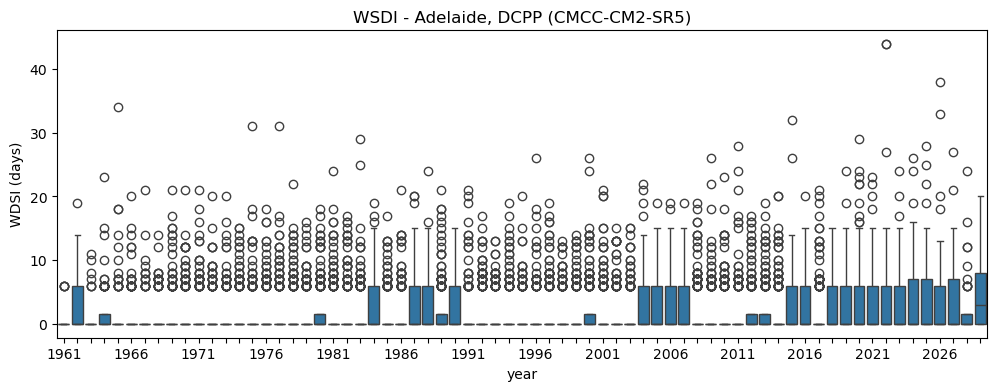

In [92]:
fig, ax = plt.subplots(figsize=[12, 4])
sns.boxplot(ax=ax, data=wsdi_df, x='year', y='WSDI')
ax.set_ylabel('WDSI (days)')
ax.set_xlabel('year')
ax.set_title('WSDI - Adelaide, DCPP (CMCC-CM2-SR5)')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
plt.show()